In [3]:
# Marketting A/B TESTING
import numpy as np                 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare

In [ ]:
# Import the data from kaggle
marketing = pd.read_csv('marketing_AB.csv')
marketing.head()


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [8]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [9]:
marketing.isna().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [12]:
# find duplicated data based on user id
dupes = marketing.duplicated(subset='user id').sum()
print('Number of duplicated rows: ', dupes)

Number of duplicated rows:  0


In [13]:
marketing.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [15]:
marketing.columns.to_list()

['Unnamed: 0',
 'user id',
 'test group',
 'converted',
 'total ads',
 'most ads day',
 'most ads hour']

In [17]:
# drop user_id and 
marketing.drop(['user id', 'Unnamed: 0'], axis=1, inplace=True)
marketing.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


In [22]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   test group     588101 non-null  object
 1   converted      588101 non-null  bool  
 2   total ads      588101 non-null  int64 
 3   most ads day   588101 non-null  object
 4   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 18.5+ MB


In [25]:
market_cat_data = marketing[['test group', 'converted', 'most ads day', 'most ads hour']]
market_cat_data.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [30]:
print(market_cat_data['test group'].unique())
print(market_cat_data['converted'].unique())
print(market_cat_data['most ads day'].unique())
print(market_cat_data['most ads hour'].unique())

['ad' 'psa']
[False  True]
['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
[20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


- **two test groups**
- **ads**
- **public service announcements**

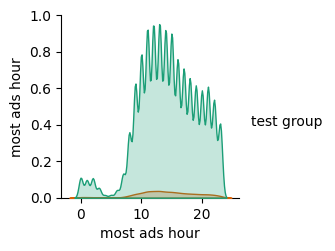

In [35]:
sns.pairplot(data=marketing[['test group','most ads hour']], hue='test group', palette='Dark2')
plt.show()

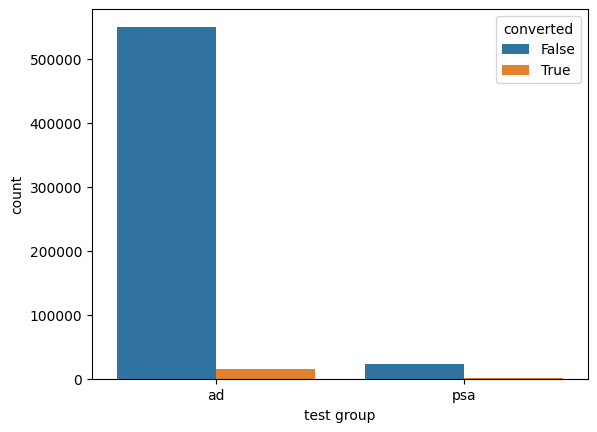

In [36]:
sns.countplot(data=marketing, x='test group', hue='converted')
plt.show()

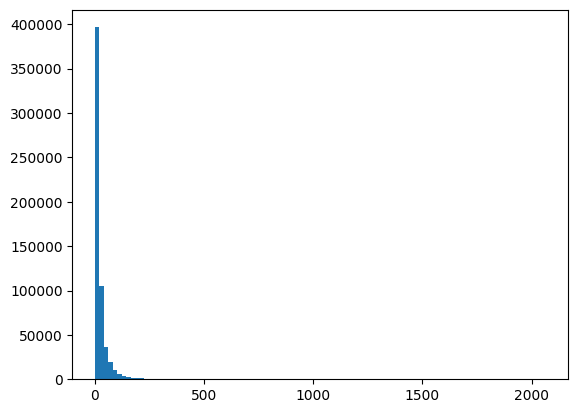

In [39]:
plt.hist(marketing['total ads'], bins=100)
plt.show()

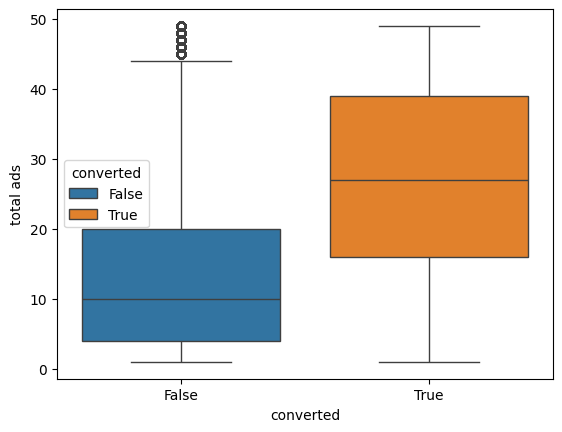

In [55]:
sns.boxplot(x='converted', y='total ads', data=marketing[marketing['total ads'] < 50], hue='converted');
#plt.show()

In [50]:
#definne the two groups
control_group = marketing[marketing['test group'] == 'psa']
test_group = marketing[marketing['test group'] == 'ad']

# print results
print('shape of control', control_group.shape)
print('shape of test', test_group.shape)

# print data
control_group.head()
test_group.head()

# t statistic analysis
# t-test is not required because we have data > 30
# we can use z-test

# try test as an example
t_test, p_val = stats.ttest_ind(test_group['converted'], control_group['converted'])
print(p_val)



shape of control (23524, 5)
shape of test (564577, 5)
nan


In [57]:
market_cat_data.head()

,test group,converted,most ads day,most ads hour
0,ad,False,Monday,20
1,ad,False,Tuesday,22
2,ad,False,Tuesday,18
3,ad,False,Tuesday,10
4,ad,False,Friday,14


In [65]:
# chi square test
# Null Hypothesis: There is no relationship between test group and conversion rate
# Alternative Hypothesis: There is a relationship between test group and conversion rate

from scipy.stats import chi2_contingency

for column in market_cat_data.columns:
    if column != 'converted':
        contingency_table = pd.crosstab(market_cat_data['converted'], market_cat_data[column])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f'Chi-square test for {column} and converted: p-value = {p}')
        print(f'Chi-square test for {column} and converted: p-value = {dof}')

#contingency_table = pd.crosstab(marketing['test group'], marketing['converted'])

Chi-square test for test group and converted: p-value = 1.9989623063390075e-13
Chi-square test for test group and converted: p-value = 1
Chi-square test for most ads day and converted: p-value = 1.932184379244731e-85
Chi-square test for most ads day and converted: p-value = 6
Chi-square test for most ads hour and converted: p-value = 8.027629823696771e-77
Chi-square test for most ads hour and converted: p-value = 23


In [ ]:
print(market_cat_data['test group'].unique())
print(market_cat_data['converted'].unique())
print(market_cat_data['test group'].value_counts())
print(market_cat_data['converted'].value_counts())

['ad' 'psa']
[False  True]
test group
ad     564577
psa     23524
Name: count, dtype: int64
converted
False    573258
True      14843
Name: count, dtype: int64


In [63]:
market_cat_data[market_cat_data['test group'] == 'psa']['converted'].value_counts()

converted
False    23104
True       420
Name: count, dtype: int64

Chi-square test for test group and converted: p-value = 1.9989623063390075e-13


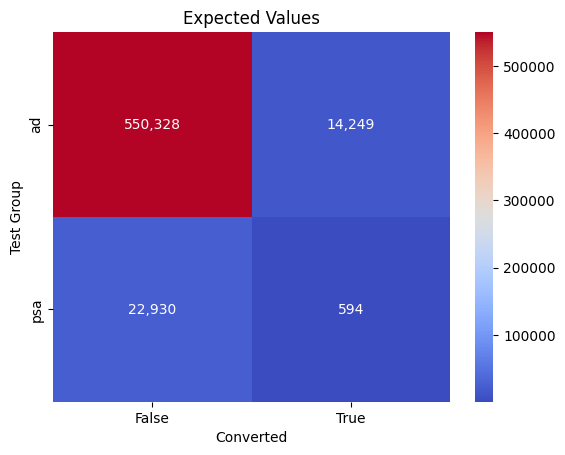

In [83]:
cont_table = pd.crosstab(market_cat_data['test group'], market_cat_data['converted'])
chi2, p, dof, expected = chi2_contingency(cont_table)
print(f'Chi-square test for test group and converted: p-value = {p}')

expected_df = pd.DataFrame(expected, columns=cont_table.columns, index=cont_table.index)
# print(expected_df)
# print(cont_table)

# visualize expected heatmap
sns.heatmap(expected_df, annot=True,fmt=",.0f", cmap='coolwarm')
plt.xlabel('Converted')
plt.ylabel('Test Group')
plt.title('Expected Values')
plt.show()

In [84]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# test of normality using shapiro test
shapiro_stat_true, shapiro_p_value_true = shapiro(marketing[marketing['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(marketing[marketing['converted'] == False]['total ads'])

print(f'Shapiro test for converted=True: p-value = {shapiro_p_value_true}')
print(f'Shapiro test for converted=False: p-value = {shapiro_p_value_false}')


Shapiro test for converted=True: p-value = 1.638680987007864e-98
Shapiro test for converted=False: p-value = 9.883049430733551e-204


c:\Users\Owner\data_evaluation\Data_Evaluation\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14843.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Owner\data_evaluation\Data_Evaluation\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 573258.
  res = hypotest_fun_out(*samples, **kwds)


In [87]:
# Equality of variance test using Levene test
levene_stat, levene_p_value = levene(marketing[marketing['converted']]['total ads'],
                                     marketing[~marketing['converted']]['total ads'])

print(f'Levene test for total ads: p-value = {levene_p_value}')

Levene test for total ads: p-value = 0.0


In [88]:
# conduct mannwhitneyu test
mannwhitneyu_stat, mannwhitneyu_p_value = mannwhitneyu(marketing[marketing['converted']]['total ads'],
                                                       marketing[~marketing['converted']]['total ads'])
print(f'Mann-Whitney U test for total ads: p-value = {mannwhitneyu_p_value}')


Mann-Whitney U test for total ads: p-value = 0.0


#### LINE
- **L: Linear Relationship between study variables**
- **I: Independence of study variables**
- **N: Normal Distribution of variables**
- **E: Equal Variance**

In [90]:
# conduct z-test assuming LINE 
from statsmodels.stats.weightstats import ztest

#
z_stat, z_p_value = ztest(marketing[marketing['converted']]['total ads'],
                          marketing[~marketing['converted']]['total ads'])

print(f'Z-test for total ads: p-value = {z_p_value}')

Z-test for total ads: p-value = 0.0
